## Bayes' Theorem

Bayes' Theorem is a powerful theorem used to compute probabilities for questions we may not have a concrete way to compute for analytically. Bayes' Theorem, when viewed diachronistically, gives us a specific framework to build solutions to different problems by building up data. The theorem is as follows:

$$
P(H|D) = \frac{P(H)P(D|H)}{P(D)}
$$

The terminology of each item in Bayes' Theorem's diachronistic expression is as follows below:

    P(H) -   the prior; the per-hypothesis probability
    P(D|H) - the likelihood; the probability of the data happening given a certain hypothesis
    P(D) -   the normalizing constant
    P(H|D) - the posterior; the updated probability of a hypothesis given new data

This notebook will be used to create a framework to solve a few Bayesian Statistics problems.

In [28]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

## The Dice Problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, a 10-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. If I select a die from the box at random, roll it, and get a 7, what is the probability that I rolled each die?


## Identifying the Data and Hypotheses

The first step to answering a problem using Bayesian Statistics is by identifying the specific data and hypotheses to be used in the problem. 

In the Dice Problem, the hypotheses to take into account are given as the different possible dice that can be rolled, and the data we have is the rolled result, or the 7.

In [29]:
hypothesis = [6,8,10,12,20]    # list of hypotheses
data = [7]       # list of data items to take into account

## Setting the Priors

The priors, or $P(H)$, are set to some specific distribution for some statistics problems. For the exercises in this notebook, the priors will be set to the uniform distribution. Later on, we can set our priors using some other distribution method.

In [30]:
def initPriors(hypothesis):
    return np.ones(len(hypothesis)) / len(hypothesis)     # set each prior to a uniform value

## Setting the Likelihood Function

The likelihood function, or $P(D|H)$ is found by calculating the probability that the data can happen given a certain hypothesis. The likelihood function generally is a relation between our data and our hypothesis, but can be found by other means as well.

For our Dice Problem, the likelihood function should answer the question: "How likely is it to roll a result of $\$data$ if our dice has $\$hypothesis$ sides?"

In [31]:
def likelihood(data, hypothesis):
    if (data > hypothesis):
        return 0
    else:
        return 1/hypothesis

## Updating Based on New Data

Once the priors and the likelihood is calculated, the Bayes' Theorem may now be applied and used to update our old beliefs into newer, more accurate probabilities based on data. We just have to code it in. To reiterate, Bayes' Theorem is as follows:

$$
P(H|D) = \frac{P(H)P(D|H)}{P(D)}
$$

In [32]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    posterior = []
    
    for h in range(len(prior)):
        posterior.append(prior[h] * likelihood(data, hypo[h]))
    
    # normalize the data by the sum, or divide by P(D)
    norm = np.sum(posterior)
    posterior = posterior / norm
    
    return posterior

## Putting Everything Together

Now, let's solve the dice problem. We can add more data later on, too, but first, let's have our code running and output the answer.

6 0.0
8 0.34883720930232553
10 0.27906976744186046
12 0.23255813953488366
20 0.13953488372093023


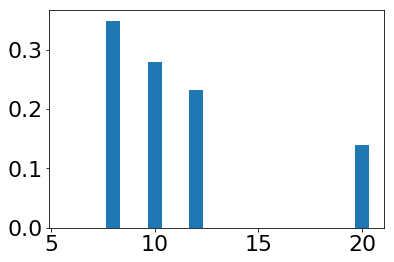

In [33]:
# given your hypothesis and data, initialize your priors.
prior = initPriors(hypothesis)

# feed the data into the update function

for d in data:
    prior = update(hypothesis, prior, d)

# print the values in the newly updated prior vector along with each hypothesis
for h in range(len(hypothesis)):
    print(hypothesis[h],prior[h])
    
# plotting code

width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()


## Try More Data!

What about if the dice rolled the numbers in the array dicerolls, after rolling the 7 above? What about if the dice rolled random numbers from an n-sided dice?

In [34]:
dicerolls = [6,8,7,7,5,4]

sides = 10       # feel free to change these variables
rolls = 10
rolldata = np.random.choice(range(1,sides+1),rolls)

## What do the answers mean?

Of course, just because you have a probability distribution doesn't mean you already have all of the answers. You simply have more data; not the important information to glean from the dataset. What information can you find from running this?

## The Locomotive Problem

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

Try to find an average guess for the number of locomotives owned by the railroad via the Bayes' Theorem. Let the number of hypotheses be 1000 at first.

Note: the posterior mean is found by $\mu = \sum XP(X)$.

Try to reason out why we can't just use the highest value, or 60, in this case.

333.41989326371095


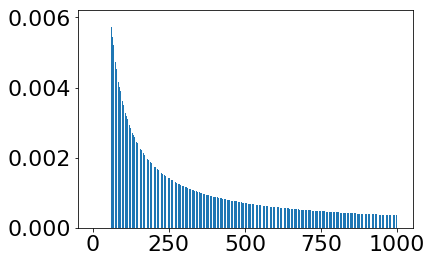

In [35]:
hypothesis = range(1, 1001)

def likelihood(data, hypo):
    if (data > hypo):
        return 0
    else:
        return 1/hypo

prior = initPriors(hypothesis)

prior = update(hypothesis, prior, 60)

mean = 0
for x in range(len(hypothesis)):
    mean += hypothesis[x] * prior[x]
    

    
# plotting code

width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

# print the found mean

print(mean)

## Is our posterior mean a 'nice' value?

To make any progress on the locomotive problem we had to make a few assumptions, and some of them were pretty arbitrary. In particular, we chose a uniform prior from 1 to 1000, without much justification for choosing 1000, or for choosing a uniform distribution.

What if our values were different? Try changing the number of predicted trains and see what the effect is on the posterior mean.  Try using the values 500 and 2000 for the number of hypotheses.

In [36]:
hyp = [range(1, 501),range(1, 1001), range(1, 2001)]

def likelihood(data, hypo):
    if (data > hypo):
        return 0
    else:
        return 1/hypo

    
for h in hyp:
    prior = initPriors(h)
    prior = update(h, prior, 60)

    mean = 0
    for x in range(len(h)):
        mean += h[x] * prior[x]

    print(len(h), mean)

500 207.07922798340903
1000 333.41989326371095
2000 552.179017164631


## Curbing the Variance: More Data

Our means vary a lot! The simple reason is because we have only one data point, so our priors matter possibly too much. If we added more data/make more train observations, our means would vary a bit less. Try it out!

In [37]:
data = [60,30,90]  # the first observation of 60 is already included, so initialize priors before running with all the data!

for h in hyp:
    prior = initPriors(h)
    
    for d in data:
        prior = update(h, prior, d)

        mean = 0
        for x in range(len(h)):
            mean += h[x] * prior[x]
        
        print(len(h), mean)
    
    print()

500 207.07922798340903
500 143.81231982097916
500 151.84958795903833

1000 333.41989326371095
1000 178.54735317971577
1000 164.3055864227335

2000 552.179017164631
2000 215.56892550615518
2000 171.3381810915093



Notes:

Rearranging the found posterior means for each data point shows the following:

    500 207.07922798340903
    1000 333.41989326371095
    2000 552.179017164631

    500 143.81231982097916
    1000 178.54735317971577
    2000 215.56892550615518

    500 151.84958795903833
    1000 164.3055864227335
    2000 171.3381810915093

Looking at these numbers, each data point reduces the variance of each by a fair bit. More data will reduce the posterior mean variance based on arbitrary values. Why?

## Curbing the Variance: Better Priors

Another way to curb the variance is by assigning better priors to our dataset by gathering some background information, because it's probably unreasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

With some effort, we could probably find a list of companies that operate locomotives in the area of observation. Or we could interview an expert in rail shipping to gather information about the typical size of companies. But even without getting into the specifics of railroad economics, we can make some educated guesses.

In most fields, there are many small companies, fewer medium-sized companies, and only one or two very large companies. In fact, the distribution of company sizes tends to follow a power law, as Robert Axtell reports in Science (see http://www.sciencemag.org/content/293/5536/1818.full.pdf).

Mathematically, a power law means that the number of companies with a given size is inversely proportional to size, or

$$P(x) \propto \Big(\frac{1}{x}\Big)^\alpha$$

In [41]:
# rewrite the prior distribution function to emulate the power law
# note: you can do this by assigning each hypothesis an initial 'score' on the power law 
#       and then normalizing the probabilities such that they add up to 1

def initPriors(hypothesis):
    priors = []
    
    for h in hypothesis:
        priors.append(1/h)
        
    return priors / np.sum(priors)

178.54735317971577


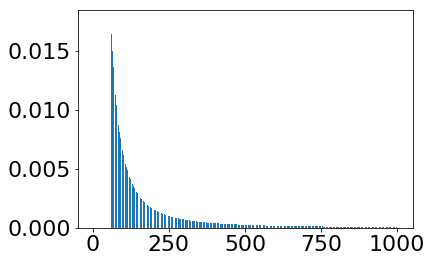

In [43]:
prior = initPriors(hypothesis)

prior = update(hypothesis, prior, 60)

mean = 0
for x in range(len(hypothesis)):
    mean += hypothesis[x] * prior[x]
    
    
# plotting code

width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

# print the found mean

print(mean)


In [44]:
hyp = [range(1, 501),range(1, 1001), range(1, 2001)]

def likelihood(data, hypo):
    if (data > hypo):
        return 0
    else:
        return 1/hypo

    
for h in hyp:
    prior = initPriors(h)
    prior = update(h, prior, 60)

    mean = 0
    for x in range(len(h)):
        mean += h[x] * prior[x]

    print(len(h), mean)

500 143.81231982097916
1000 178.54735317971577
2000 215.56892550615518


Notes: 

Compare to the earlier output:

    500 207.07922798340903
    1000 333.41989326371095
    2000 552.179017164631

The variance is much smaller. Now for the data:

In [45]:
data = [60,30,90]  # the first observation of 60 is already included, so initialize priors before running with all the data!

for h in hyp:
    prior = initPriors(h)
    
    for d in data:
        prior = update(h, prior, d)

        mean = 0
        for x in range(len(h)):
            mean += h[x] * prior[x]
        
        print(len(h), mean)
    
    print()

500 143.81231982097916
500 106.36102951451464
500 130.70846986255998

1000 178.54735317971577
1000 112.32543159449723
1000 133.27523137503098

2000 215.56892550615518
2000 115.56822772356378
2000 133.99746308073088



Taking all the data into account:


Before changing priors:

    500 151.84958795903833
    1000 164.3055864227335
    2000 171.3381810915093
    
After:

    500 130.70846986255998
    1000 133.27523137503098
    2000 133.99746308073088

## Point Estimates and Interval Estimates

We use posterior means to describe our dataset because the mean of a dataset is the value that minimizes error if a lot of different guesses are made and the error is totalled up throughout those guesses. But in the end, the posterior mean is also one single point; or a single guess to what the true 'answer' to the question is. If we wanted to make our guess more general with a certain level of certainty, we have equations for Confidence Intervals, but they only work for normal distributions, and our data is definitely not normally distributed.

Fortunately, calculation of an interval given a large normalized dataset is very simple:

In [46]:
def percentile(prior, hypothesis, percent):
    p = percent / 100
    
    total = 0
    
    for i in range(len(hypothesis)):
        total += prior[i]
        if (total >= p):
            return hypothesis[i]

The *percentile* function is a function that calculates a cumulative percent of the dataset starting from zero, much like how our Z-table works. To use the function to calculate an 90% interval estimate for the number of trains N, simply call $P(5)$ and $P(95)$ for a 90% interval.

In [47]:
print("(", percentile(prior, hypothesis, 5),",",percentile(prior, hypothesis, 95), ")")

( 91 , 243 )


Remember what these intervals mean? This just means our inferred true mean lies between 91 and 243 after our priors, data, and calculations. Still a large variance, but it is a calculation independent from our assumptions earlier in the term where our data needs to be in a normal distribution.

## Homework #1: More Train Companies?!

In our first train example, we made the assumption that we have only one train company with N trains. But that isn't true to real life, as one railroad may be used by multiple train companies with different numbers of trains.

Try to extend the current railroad example to multiple train companies; where you are equally likely to see any train operated by any company.


Some arbitrary assumptions:

 * Hypothesis corresponds to the total number of trains that exist.
 * Data corresponds to the trains seen.
 * The distribution of train companies follows an inverse-power law distribution, or Zipf's distribution.
 * The distribution of trains for any given company is also an inverse-power law distribution.

178.54735317971577


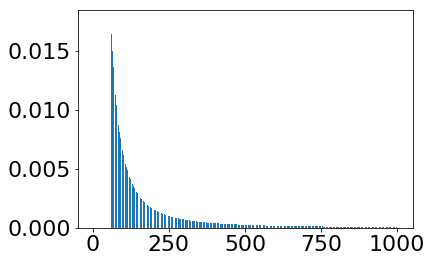

In [49]:
def likelihood_old(data, hypo):
    if (data > hypo):
        return 0
    else:
        return 1/hypo
    
def train_distribution(hypo):
    pdf = []
    
    for h in hypo:
        pdf.append(1/h)
        
    return pdf / np.sum(pdf)
    
def likelihood_generalized(data, hypo, train_dist, total):
    if (data > hypo):
        return 0
    else:
        return likelihood_old(data, hypo) * train_dist[hypo] * total

    

prior = initPriors(hypothesis)

prior = update(hypothesis, prior, 60)

mean = 0
for x in range(len(hypothesis)):
    mean += hypothesis[x] * prior[x]
    
    
# plotting code

width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

# print the found mean

print(mean)


References: 
    Think Bayes, Green Tea Press, Allen B. Downey